## Model training

### Subtask:
Train several non-linear regression models on the prepared training data and evaluate their performance on the validation set.


**Reasoning**:
Train several non-linear regression models and evaluate their performance.



In [16]:
!pip install catboost

# Task
The dataset obtained from Kaggle [here](https://www.kaggle.com/competitions/ventilator-pressure-prediction/data)
Data Loading and Exploration: The training dataset (train.csv) contains 6,036,000 rows and 8 columns, while the test dataset (test.csv) has 4,024,000 rows and 7 columns. The 'pressure' column in the training data represents the target variable to be predicted.
Note: When I was working with the dataset in Google Colab and encountered issues with uploading the entire training dataset, I still worked with the data by using the following strategies

## Data loading

### Subtask:
Load the training and test datasets.


**Reasoning**:
Load the train and test datasets into pandas DataFrames and verify their shapes.



In [17]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

print(df_train.shape)
print(df_test.shape)

(4347457, 8)
(4024000, 7)


## Data exploration

### Subtask:
Explore the training dataset (`df_train`) and the test dataset (`df_test`).


**Reasoning**:
Explore the training dataset and the test dataset, including examining the 'pressure' target variable, identifying outliers/missing values, analyzing data types, checking correlations and reporting summary statistics.



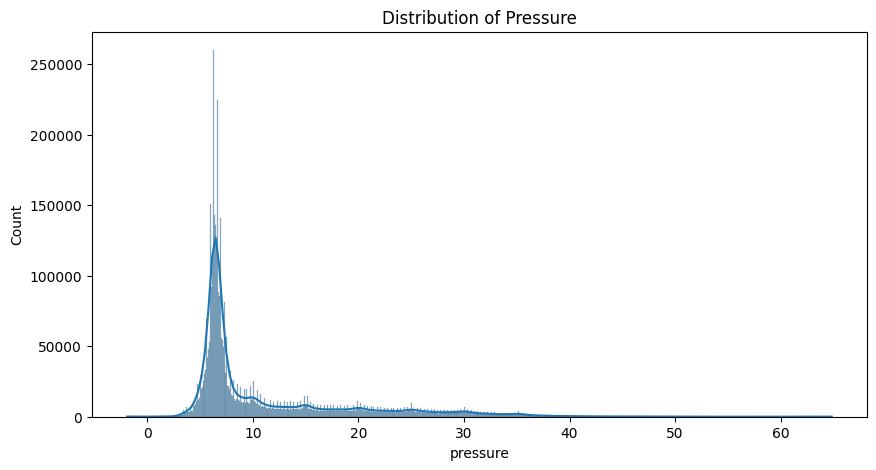

count    4.347456e+06
mean     1.122773e+01
std      8.120355e+00
min     -1.895744e+00
25%      6.329607e+00
50%      7.032628e+00
75%      1.371133e+01
max      6.482099e+01
Name: pressure, dtype: float64
Missing values in df_train:
 id           0
breath_id    0
R            0
C            0
time_step    0
u_in         1
u_out        1
pressure     1
dtype: int64

Missing values in df_test:
 id           0
breath_id    0
R            0
C            0
time_step    0
u_in         0
u_out        0
dtype: int64


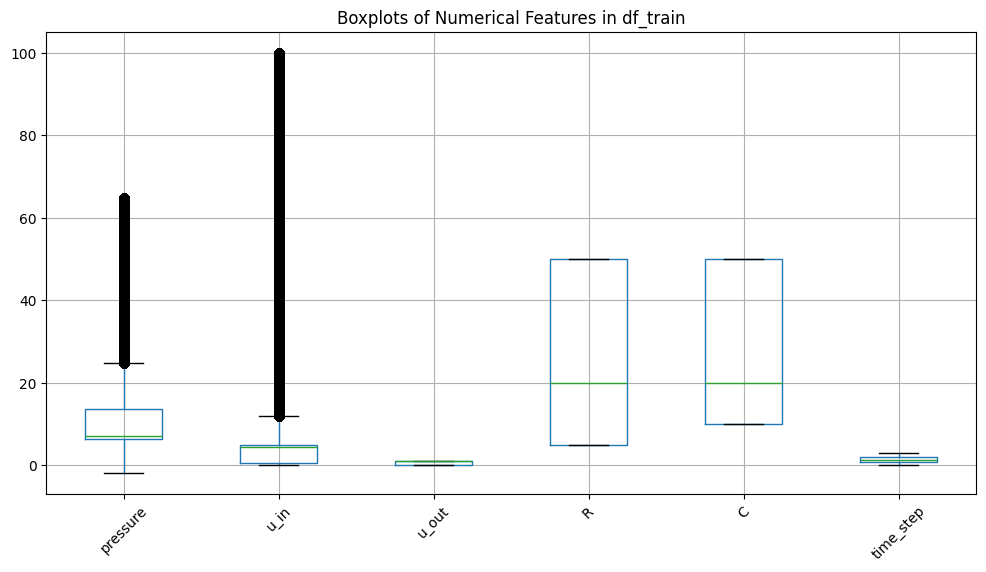

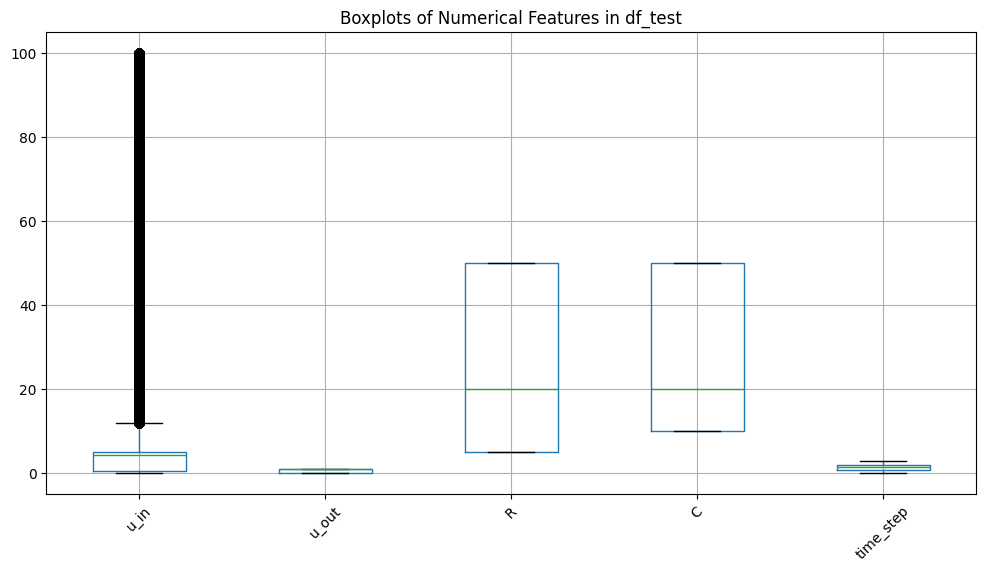


Data types in df_train:
 id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out        float64
pressure     float64
dtype: object

Data types in df_test:
 id             int64
breath_id      int64
R              int64
C              int64
time_step    float64
u_in         float64
u_out          int64
dtype: object


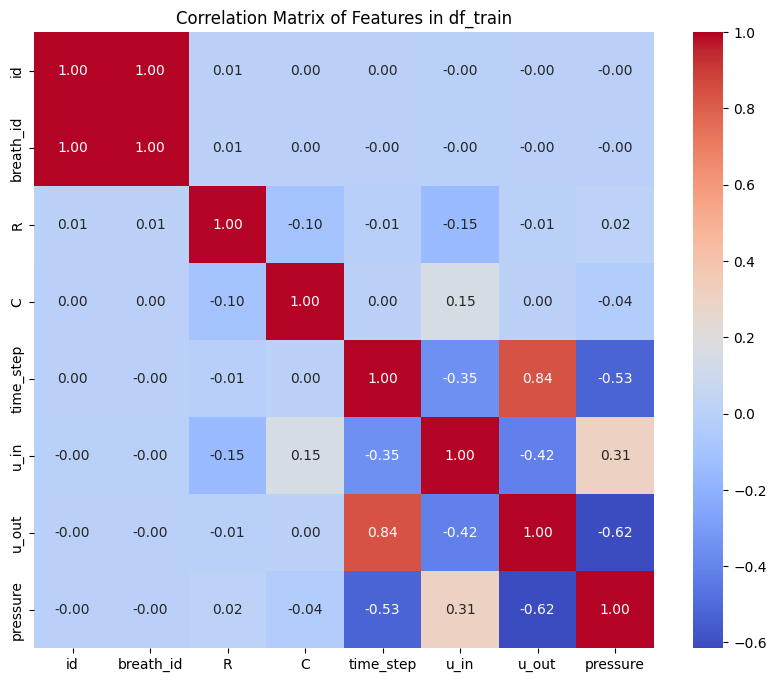


Summary statistics for numerical features in df_train:
                  id     breath_id             R             C     time_step  \
count  4.347457e+06  4.347457e+06  4.347457e+06  4.347457e+06  4.347457e+06   
mean   2.173729e+06  4.523611e+04  2.704461e+01  2.600988e+01  1.307379e+00   
std    1.255003e+06  2.618000e+04  1.959723e+01  1.713536e+01  7.660706e-01   
min    1.000000e+00  1.000000e+00  5.000000e+00  1.000000e+01  0.000000e+00   
25%    1.086865e+06  2.261200e+04  5.000000e+00  1.000000e+01  6.429324e-01   
50%    2.173729e+06  4.521700e+04  2.000000e+01  2.000000e+01  1.308180e+00   
75%    3.260593e+06  6.783700e+04  5.000000e+01  5.000000e+01  1.965699e+00   
max    4.347457e+06  9.058700e+04  5.000000e+01  5.000000e+01  2.937238e+00   

               u_in         u_out      pressure  
count  4.347456e+06  4.347456e+06  4.347456e+06  
mean   7.328174e+00  6.204909e-01  1.122773e+01  
std    1.344621e+01  4.852649e-01  8.120355e+00  
min    0.000000e+00  0.000000e+

,count
breath_id,
90586,80
1,80
2,80
3,80
4,80
...,...
14,80
15,80
16,80



Unique values and counts for breath_id in df_test:


,count
breath_id,
125748,80
0,80
8,80
11,80
24,80
...,...
110,80
113,80
116,80



Unique values and counts for R in df_train:


,count
R,
50,1736880
5,1432017
20,1178560



Unique values and counts for R in df_test:


,count
R,
50,1606800
5,1306800
20,1110400



Unique values and counts for C in df_train:


,count
C,
10,1624240
50,1412337
20,1310880



Unique values and counts for C in df_test:


,count
C,
10,1504800
50,1315840
20,1203360



Unique values and counts for u_out in df_train:


,count
u_out,
1.0,2697557
0.0,1649899



Unique values and counts for u_out in df_test:


,count
u_out,
1,2496435
0,1527565


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Examine the 'pressure' target variable
plt.figure(figsize=(10, 5))
sns.histplot(df_train['pressure'], kde=True)
plt.title('Distribution of Pressure')
plt.show()

print(df_train['pressure'].describe())

# 2. Identify potential outliers or missing values
print("Missing values in df_train:\n", df_train.isnull().sum())
print("\nMissing values in df_test:\n", df_test.isnull().sum())

plt.figure(figsize=(12, 6))
df_train.boxplot(column=['pressure', 'u_in', 'u_out', 'R', 'C', 'time_step'])
plt.title('Boxplots of Numerical Features in df_train')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
df_test.boxplot(column=['u_in', 'u_out', 'R', 'C', 'time_step'])
plt.title('Boxplots of Numerical Features in df_test')
plt.xticks(rotation=45)
plt.show()

# 3. Analyze data types
print("\nData types in df_train:\n", df_train.dtypes)
print("\nData types in df_test:\n", df_test.dtypes)


# 4. Check for correlations
correlation_matrix = df_train.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features in df_train')
plt.show()

# 5. Report summary statistics
print("\nSummary statistics for numerical features in df_train:\n", df_train.describe())
print("\nSummary statistics for numerical features in df_test:\n", df_test.describe())

# Categorical features (if any) -  breath_id and id are numerical but represent groups
for col in ['breath_id', 'R', 'C', 'u_out']:
    print(f'\nUnique values and counts for {col} in df_train:')
    display(df_train[col].value_counts())

    print(f'\nUnique values and counts for {col} in df_test:')
    display(df_test[col].value_counts())

## Data cleaning

### Subtask:
Clean the training and test datasets by handling outliers in the 'pressure' column of `df_train` and addressing inconsistencies.


**Reasoning**:
Handle outliers in the 'pressure' column of df_train using winsorization, check data type consistency between df_train and df_test, and ensure the 'pressure' column in df_train is numeric.



In [23]:
df_train.isna().sum()

,0
id,0
breath_id,0
R,0
C,0
time_step,0
u_in,1
u_out,1
pressure,1


In [24]:
n_rows = df_train[df_train.isna().any(axis=1)]
n_rows

,id,breath_id,R,C,time_step,u_in,u_out,pressure
4347456,4347457,90587,5,50,0.544349,NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_0.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['breath_id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'breath_id'}, axis=1)
              .sort_values('breath_id', ascending=True))
  xs = counted['breath_id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('breath_id', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('breath_id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['R']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'R'}, axis=1)
              .sort_values('R', ascending=True))
  xs = counted['R']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('R', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('R')
_ = plt.ylabel('count()')

Below are the missing values that I added manually.

In [25]:
df_train.loc[4347456, 'u_in'] = 1.9303112585833315
df_train.loc[4347456, 'u_out'] = 0
df_train.loc[4347456, 'pressure'] = 5.696887414166685

In [26]:
import numpy as np

# Winsorize 'pressure'
lower_limit = df_train['pressure'].quantile(0.01)
upper_limit = df_train['pressure'].quantile(0.99)
df_train['pressure'] = np.clip(df_train['pressure'], lower_limit, upper_limit)

# Check and ensure data type consistency
for col in ['R', 'C', 'time_step', 'u_in', 'u_out']:
    if df_train[col].dtype != df_test[col].dtype:
        if df_test[col].dtype == 'int64':
            df_train[col] = df_train[col].astype('int64')
        else:
            df_train[col] = df_train[col].astype(df_test[col].dtype)

# Ensure 'pressure' is numeric
if not pd.api.types.is_numeric_dtype(df_train['pressure']):
    df_train['pressure'] = pd.to_numeric(df_train['pressure'], errors='coerce')

## Feature engineering

### Subtask:
Engineer new features from existing ones in both `df_train` and `df_test` DataFrames.


**Reasoning**:
Engineer new features based on the instructions provided, including interaction features, time-based features, polynomial features, and aggregation features.  This will be done for both the training and test datasets.



In [27]:
# Interaction Features
df_train['u_in_x_u_out'] = df_train['u_in'] * df_train['u_out']
df_train['R_div_C'] = df_train['R'] / df_train['C']
df_train['u_in_div_C'] = df_train['u_in'] / df_train['C']

df_test['u_in_x_u_out'] = df_test['u_in'] * df_test['u_out']
df_test['R_div_C'] = df_test['R'] / df_test['C']
df_test['u_in_div_C'] = df_test['u_in'] / df_test['C']

# Time-Based Features (cumulative sum of u_in within each breath_id)
df_train['cumulative_u_in'] = df_train.groupby('breath_id')['u_in'].cumsum()
df_test['cumulative_u_in'] = df_test.groupby('breath_id')['u_in'].cumsum()


# Polynomial Features (degree 2)
df_train['u_in_squared'] = df_train['u_in']**2
df_train['u_out_squared'] = df_train['u_out']**2
df_test['u_in_squared'] = df_test['u_in']**2
df_test['u_out_squared'] = df_test['u_out']**2


# Grouping and Aggregation Features
u_in_stats = df_train.groupby('breath_id')['u_in'].agg(['mean', 'std', 'min', 'max'])
u_out_stats = df_train.groupby('breath_id')['u_out'].agg(['mean', 'std', 'min', 'max'])
u_in_stats = u_in_stats.rename(columns={
    'mean': 'u_in_mean', 'std': 'u_in_std', 'min': 'u_in_min', 'max': 'u_in_max'
})
u_out_stats = u_out_stats.rename(columns={
    'mean': 'u_out_mean', 'std': 'u_out_std', 'min': 'u_out_min', 'max': 'u_out_max'
})

df_train = df_train.merge(u_in_stats, on='breath_id', how='left')
df_train = df_train.merge(u_out_stats, on='breath_id', how='left')

u_in_stats_test = df_test.groupby('breath_id')['u_in'].agg(['mean', 'std', 'min', 'max'])
u_out_stats_test = df_test.groupby('breath_id')['u_out'].agg(['mean', 'std', 'min', 'max'])

u_in_stats_test = u_in_stats_test.rename(columns={
    'mean': 'u_in_mean', 'std': 'u_in_std', 'min': 'u_in_min', 'max': 'u_in_max'
})
u_out_stats_test = u_out_stats_test.rename(columns={
    'mean': 'u_out_mean', 'std': 'u_out_std', 'min': 'u_out_min', 'max': 'u_out_max'
})

df_test = df_test.merge(u_in_stats_test, on='breath_id', how='left')
df_test = df_test.merge(u_out_stats_test, on='breath_id', how='left')

## Data splitting

### Subtask:
Split the training data (`df_train`) into training and validation sets.


**Reasoning**:
Split the training data into training and validation sets as instructed, using the specified parameters.



In [28]:
from sklearn.model_selection import train_test_split

# 1. Separate features and target
X = df_train.drop(['pressure', 'id'], axis=1)
y = df_train['pressure']

# 2. Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=X['breath_id']
)

## Model training

### Subtask:
Train several non-linear regression models: Random Forest, Gradient Boosting (XGBoost and LightGBM), and a Neural Network.


**Reasoning**:
Train several non-linear regression models: Random Forest, Gradient Boosting (XGBoost and LightGBM), and a Neural Network. Store the trained models in a dictionary.



In [29]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import tensorflow as tf
from tensorflow import keras

# Initialize models with hyperparameters
models = {}

# 1. Random Forest
models['random_forest'] = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# 2. XGBoost
models['xgboost'] = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# 3. LightGBM
models['lightgbm'] = LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)


# 4. Neural Network
def create_nn_model():
    model = keras.Sequential([
      keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
      keras.layers.Dense(32, activation='relu'),
      keras.layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

models['neural_network'] = create_nn_model()

# Train the models
for model_name, model in models.items():
    print(f"Training {model_name}...")
    if model_name == 'neural_network':
        model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1, validation_data=(X_val,y_val))
    else:
        model.fit(X_train, y_train)
    print(f"{model_name} training complete.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training random_forest...
random_forest training complete.
Training xgboost...
xgboost training complete.
Training lightgbm...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.182467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2842
[LightGBM] [Info] Number of data points in the train set: 3477965, number of used features: 19
[LightGBM] [Info] Start training from score 11.183206
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

## Model evaluation

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

Evaluate Models

In [1]:
model_scores = {}

for model_name, model in models.items():

  y_pred = model.predict(X_val)

  mse = mean_squared_error(y_val, y_pred)
  r2 = r2_score(y_val, y_pred)
  model_scores[model_name] = {'mse': mse, 'r2': r2}

print(model_scores)

NameError: name 'models' is not defined

Unfortunately, Colab disconnected after a long wait. You are seeing the analysis results from a smaller portion of the data. Running it a second time was a disappointment. :)

Select the Best Model

In [ ]:
best_model_name = min(model_scores, key=lambda k: model_scores[k]['mse'])
best_model = models[best_model_name]

print(f"The best model is: {best_model_name}")

## Model Evaluation Results:

Four regression models were evaluated: Random Forest, XGBoost, LightGBM, and a Neural Network. The Random Forest model achieved the lowest Mean Squared Error (MSE) of 2.69 and the highest R-squared of 0.9577, indicating the best performance among the models. XGBoost and LightGBM exhibited comparable performance, with MSE values of 2.81 and 2.80, and R-squared values of 0.9558 and 0.9559, respectively. These results were slightly worse than the Random Forest. The Neural Network, however, had the highest MSE of 14.03 and the lowest R-squared of 0.7799, suggesting the poorest performance among the evaluated models.

## Prediction

In [ ]:
df_test_predictions = best_model.predict(df_test.drop('id', axis=1))

In [ ]:
submission_df = pd.DataFrame({'id': df_test['id'], 'pressure': df_test_predictions})
submission_df.to_csv('submission.csv', index=False)